# Subclust

The goal of this notebook is to determine whether or not we could cluster outliers together, in order to improve the accuracy of a subsequent clustering, and so, reliably.



As of now, we are post processing data AFTER PCA, this should be changed to data before PCA

In [1]:
import sys
import importlib

# data manipulation
import pandas as pd

# pytorch specific
import torch

# project specific
sys.path.append('../')
from src import config
from src.utils import experiment, helpers


pd.options.display.width = 1000
DEVICE = torch.device(config["DEVICE"])

# We start from our best performing configuration

/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


input shape : 3242
(1231, 3242)
(1231, 1, 3242)
train data: 1231
Running the following configuration:
../workfiles/light_BRCA_ds.pkl
{'variational': False, 'convolution': True, 'transformer': False, 'dropout': 0.3, 'latent_dim': 16, 'padding': 2, 'kernel_size': 5}


  0%|          | 9/3000 [00:15<1:20:44,  1.62s/it]

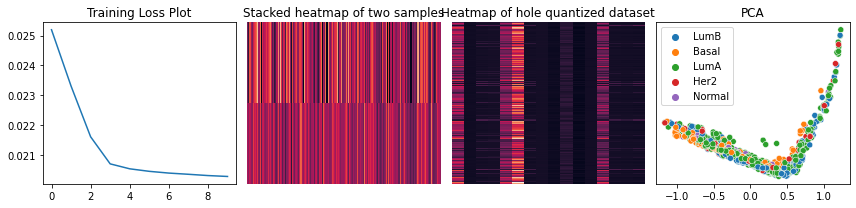

  0%|          | 10/3000 [00:18<1:37:05,  1.95s/it]

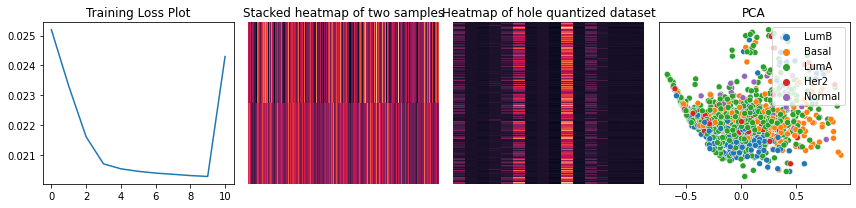

  0%|          | 12/3000 [00:22<1:39:33,  2.00s/it]

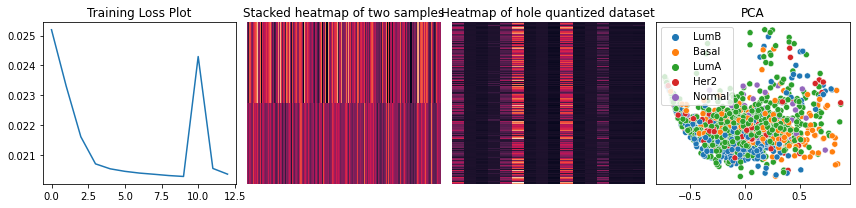

  0%|          | 14/3000 [00:26<1:41:25,  2.04s/it]

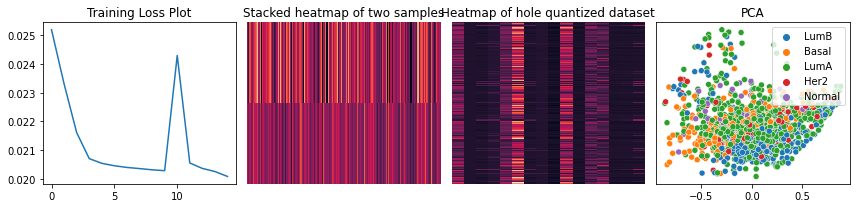

  1%|          | 16/3000 [00:30<1:39:56,  2.01s/it]

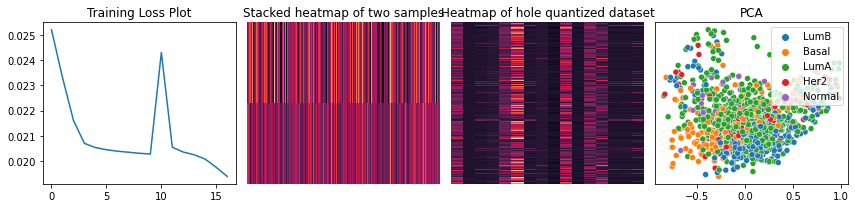

  1%|          | 19/3000 [00:36<1:32:48,  1.87s/it]

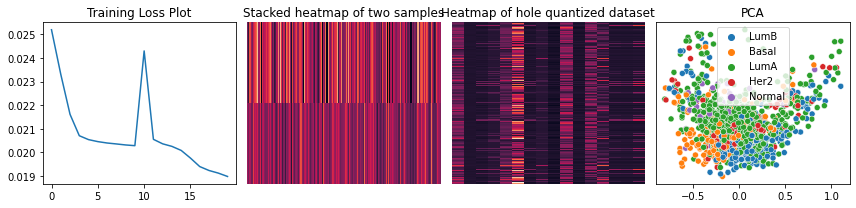

  1%|          | 22/3000 [00:42<1:30:12,  1.82s/it]

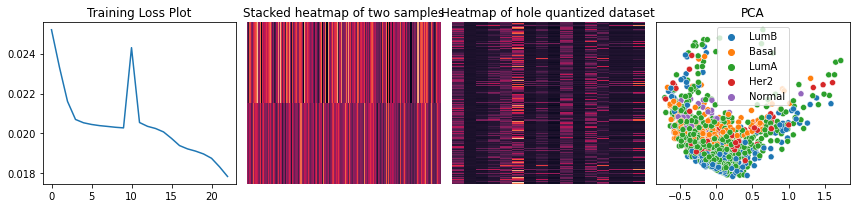

  1%|          | 25/3000 [00:48<1:29:34,  1.81s/it]

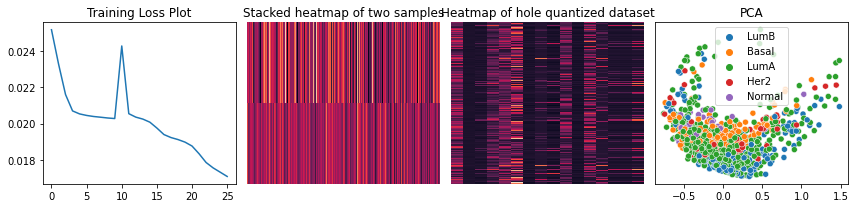

  1%|          | 29/3000 [00:55<1:27:46,  1.77s/it]

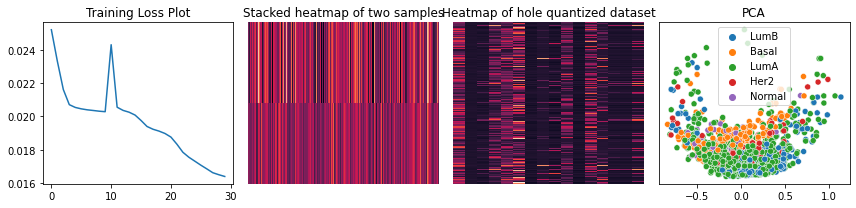

  1%|          | 34/3000 [01:04<1:21:58,  1.66s/it]

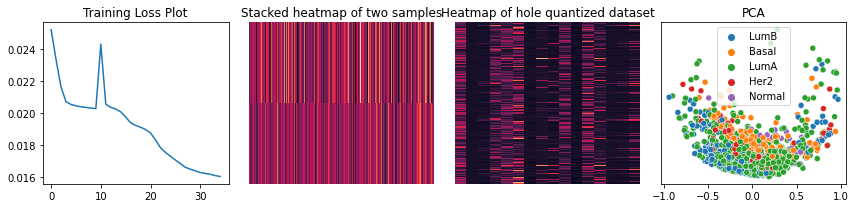

  1%|▏         | 39/3000 [01:13<1:21:19,  1.65s/it]

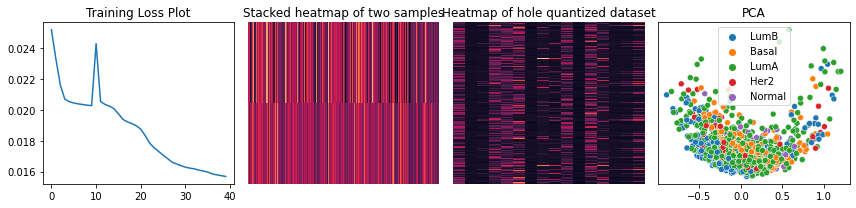

  2%|▏         | 46/3000 [01:25<1:18:36,  1.60s/it]

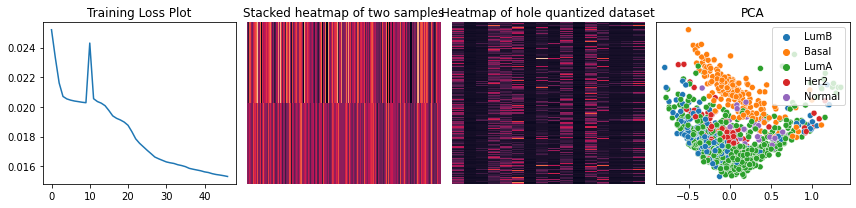

  2%|▏         | 53/3000 [01:37<1:17:35,  1.58s/it]

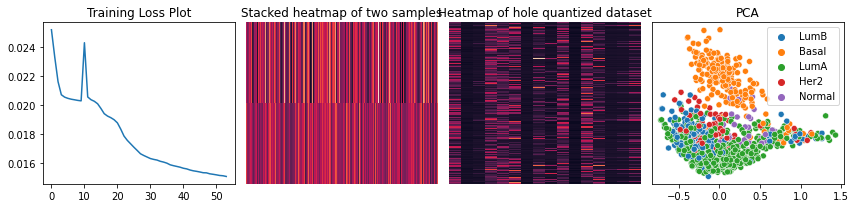

  2%|▏         | 61/3000 [01:51<1:17:32,  1.58s/it]

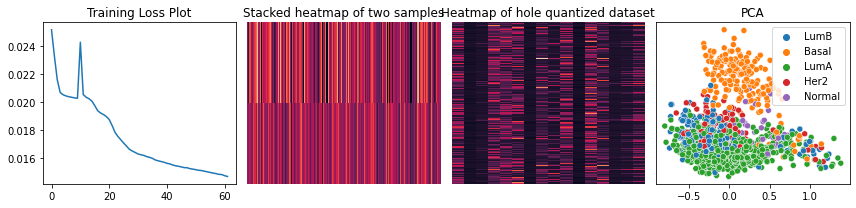

  2%|▏         | 70/3000 [02:06<1:18:57,  1.62s/it]

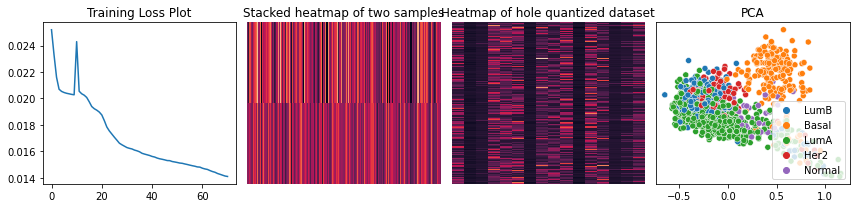

  3%|▎         | 81/3000 [02:24<1:16:47,  1.58s/it]

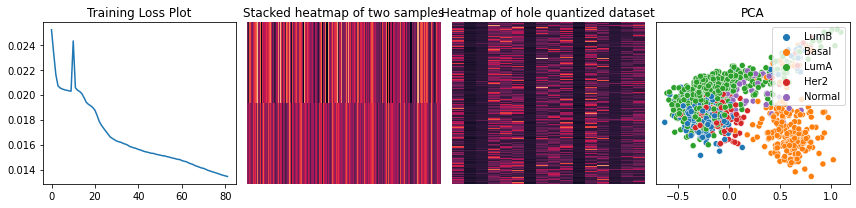

  3%|▎         | 94/3000 [02:46<1:14:54,  1.55s/it]

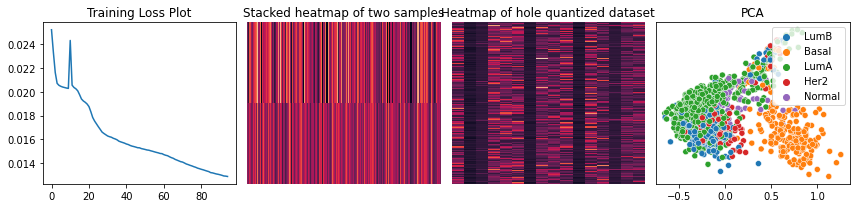

  4%|▎         | 108/3000 [03:10<1:28:50,  1.84s/it]

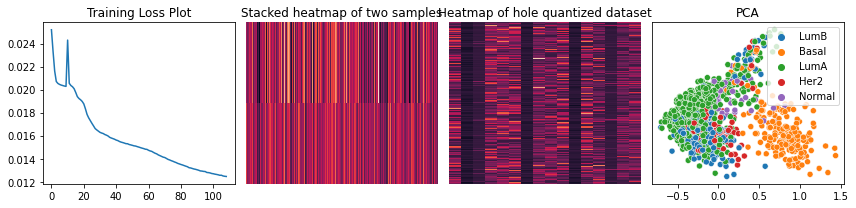

  4%|▍         | 125/3000 [03:38<1:15:58,  1.59s/it]

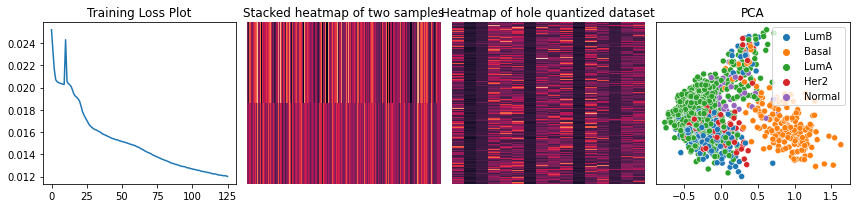

  5%|▍         | 144/3000 [04:11<1:19:13,  1.66s/it]

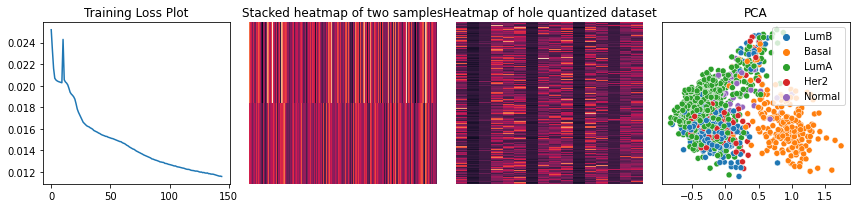

  6%|▌         | 166/3000 [04:47<1:12:43,  1.54s/it]

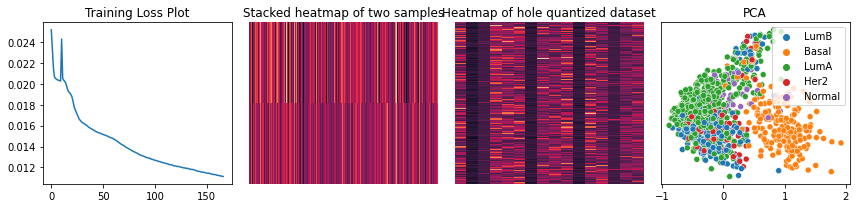

  6%|▋         | 192/3000 [05:28<1:11:42,  1.53s/it]

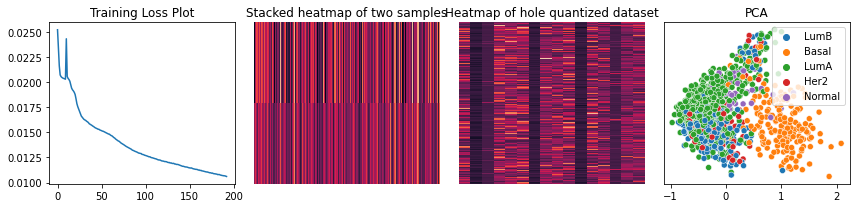

  7%|▋         | 221/3000 [06:14<1:12:33,  1.57s/it]

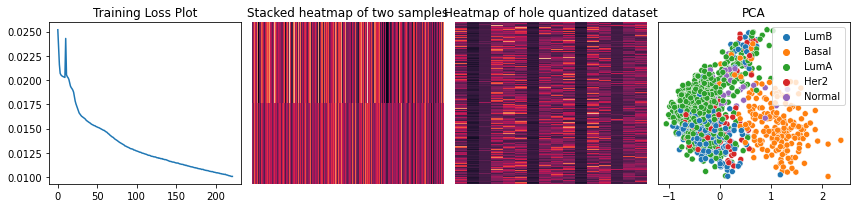

  8%|▊         | 254/3000 [07:07<1:11:50,  1.57s/it]

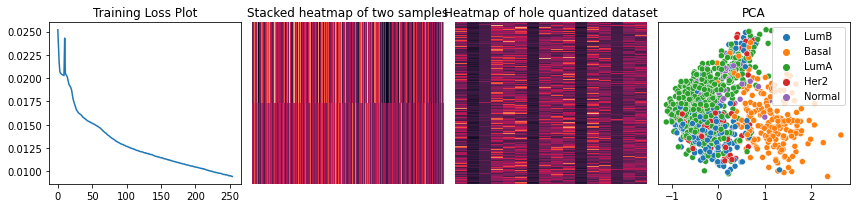

 10%|▉         | 293/3000 [08:07<1:07:36,  1.50s/it]

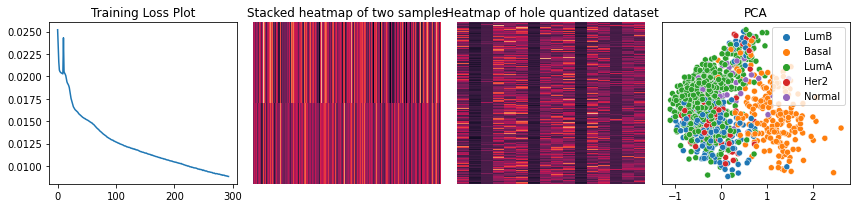

 11%|█▏        | 338/3000 [09:16<1:06:50,  1.51s/it]

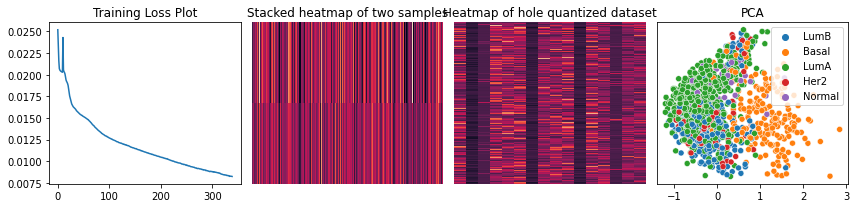

 13%|█▎        | 389/3000 [10:35<1:06:50,  1.54s/it]

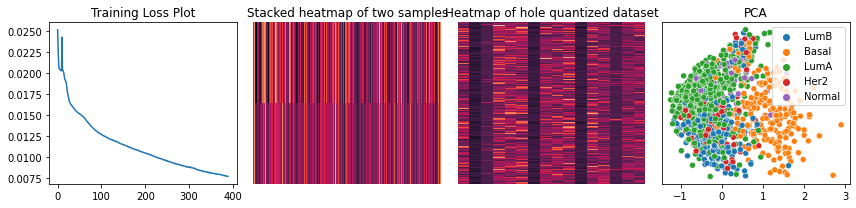

 15%|█▍        | 448/3000 [12:07<1:04:50,  1.52s/it]

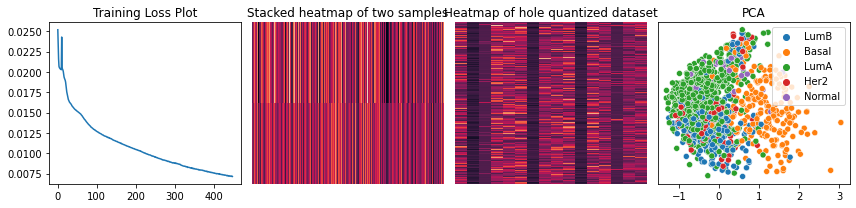

 17%|█▋        | 516/3000 [13:53<1:03:52,  1.54s/it]

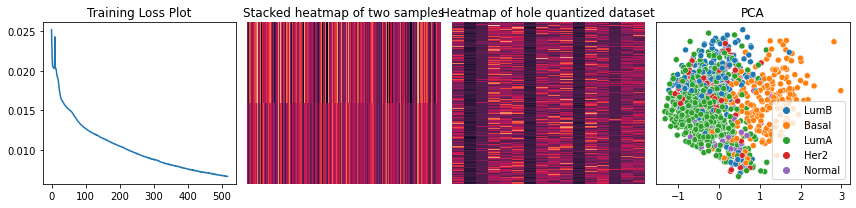

 20%|█▉        | 595/3000 [15:56<1:01:09,  1.53s/it]

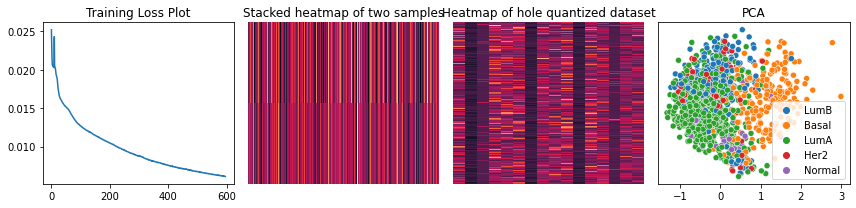

 23%|██▎       | 685/3000 [18:15<1:02:58,  1.63s/it]

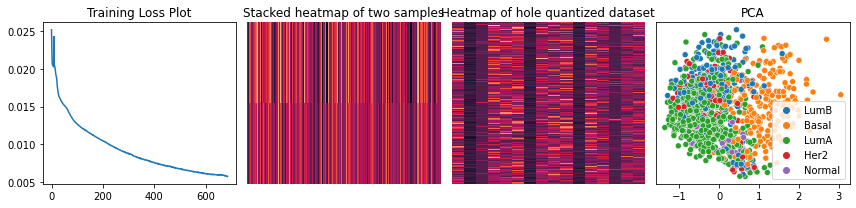

 26%|██▋       | 789/3000 [20:57<57:31,  1.56s/it]  

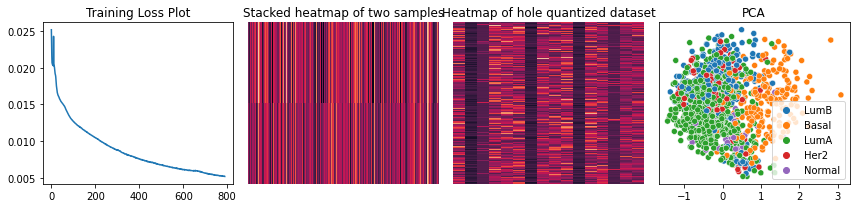

 30%|███       | 909/3000 [24:01<52:44,  1.51s/it]  

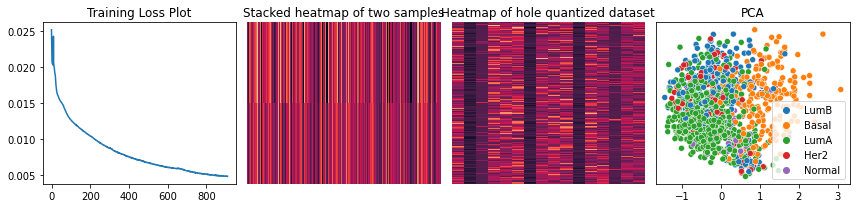

 35%|███▍      | 1047/3000 [27:49<51:35,  1.58s/it]  

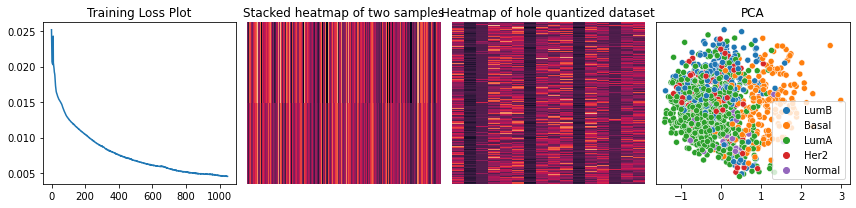

 40%|████      | 1205/3000 [31:42<45:13,  1.51s/it]  

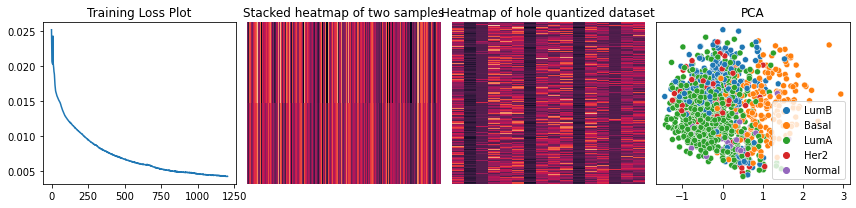

 46%|████▋     | 1388/3000 [36:19<40:38,  1.51s/it]  

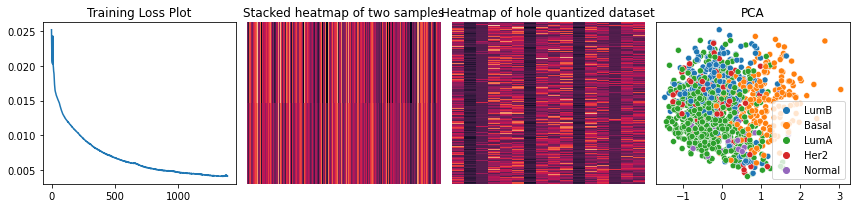

 53%|█████▎    | 1598/3000 [41:27<33:53,  1.45s/it]

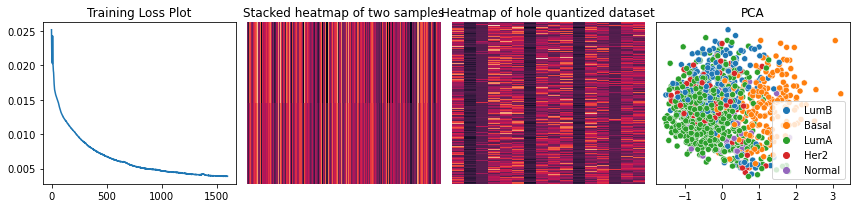

 61%|██████▏   | 1841/3000 [47:37<35:02,  1.81s/it]

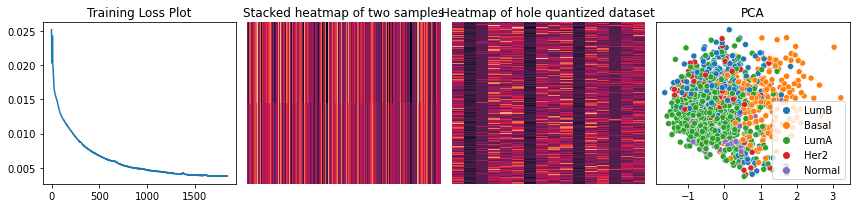

 71%|███████   | 2119/3000 [54:43<21:59,  1.50s/it]

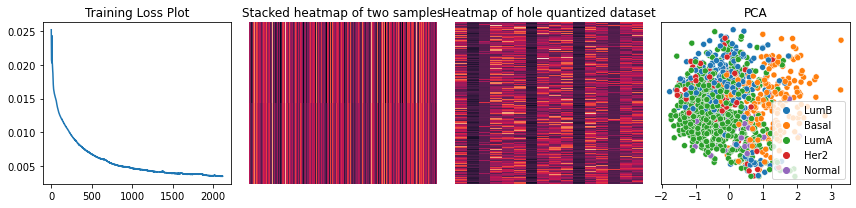

 81%|████████▏ | 2441/3000 [1:02:43<13:32,  1.45s/it]

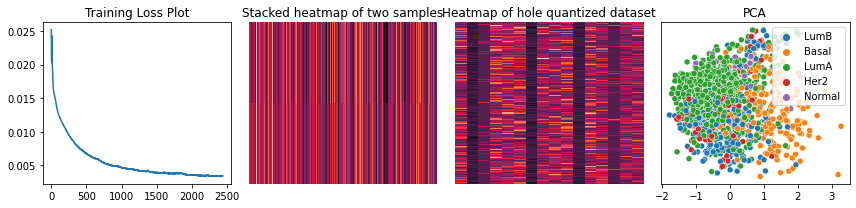

 94%|█████████▎| 2810/3000 [1:12:00<04:54,  1.55s/it]

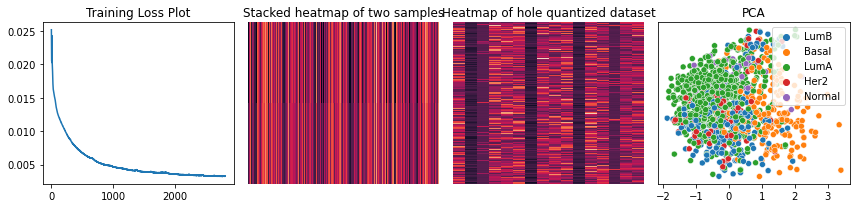

100%|██████████| 3000/3000 [1:17:08<00:00,  1.54s/it]


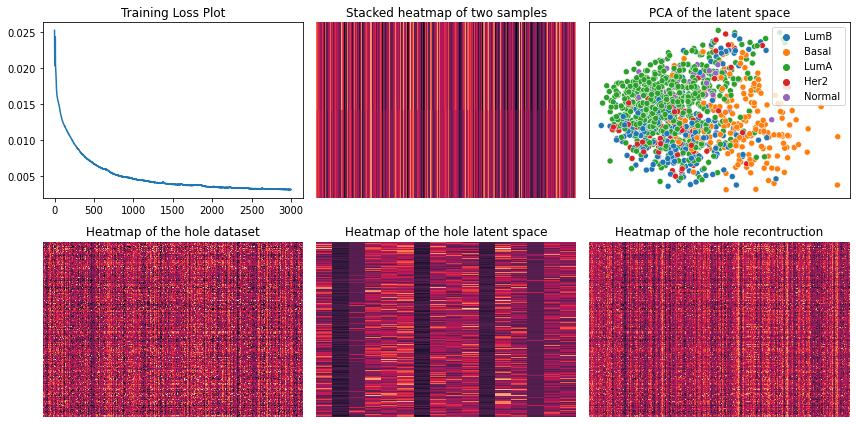

Silhouette score for 5 clusters: 0.0999133363366127


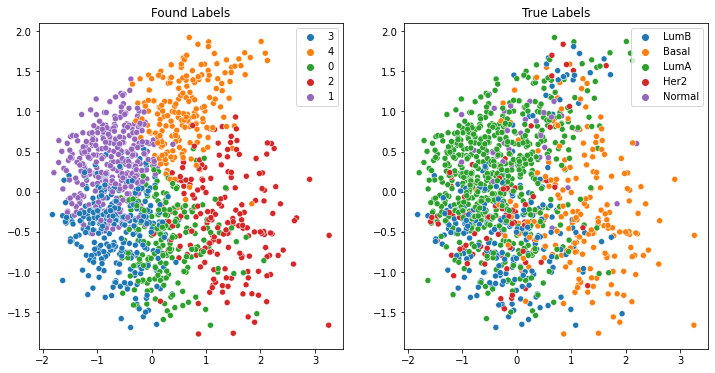

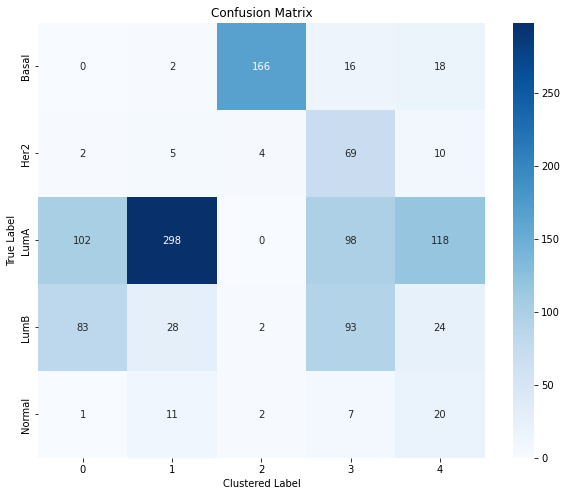

Adjusted Rand Index (ARI): 0.24
Normalized Mutual Information (NMI): 0.32
Fowlkes-Mallows Index: 0.45
Homogeneity: 0.36
Completeness: 0.29
V-measure: 0.32
Silhouette Score: 0.10


In [2]:
best_performing_config = {'variational': False, 'convolution': True, 'transformer': False, 'dropout': 0.3, 'latent_dim': 16, 'padding': 2, 'kernel_size': 5}
data_param = "../workfiles/light_BRCA_ds.pkl"

e = experiment.Experiment(data_param, best_performing_config, verbose = 2, n_epoch = 3000)
e.run()

In [4]:
encode_out, _ = helpers.  encode_recon_dataset(e.dataloader, e.model, DEVICE)



<Axes: >

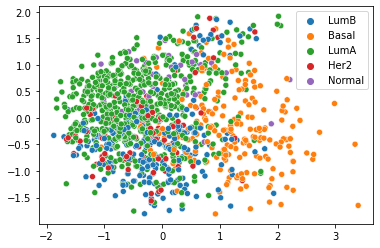

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = e.monitor.frames[-1][:,1], y=  e.monitor.frames[-1][:,2], hue = e.metadata["subtypes"])

/var/folders/xr/0fvz4r2s4wx1hx13jlhxj2z00000gn/T/ipykernel_22783/338056612.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


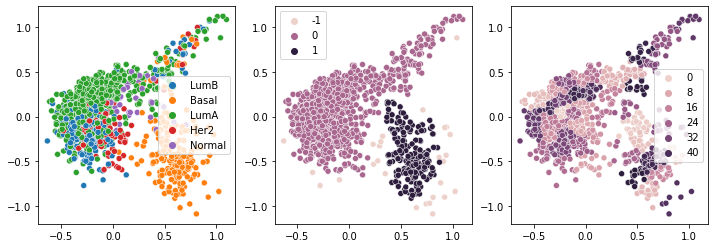

In [74]:
from sklearn.cluster import DBSCAN

from sklearn.cluster import AffinityPropagation


data = e.monitor.frames[15]


dbscan = DBSCAN(eps=.1, min_samples=5)
labels = dbscan.fit_predict(data)

af = AffinityPropagation(preference= -.200015, random_state=0).fit(data)



# prepping a 1x4 plot to monitor the model through training
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.scatterplot(x = data[:,1], y=  data[:,2], hue = e.metadata["subtypes"], ax = axs[0])
sns.scatterplot(x = data[:,1], y=  data[:,2], hue = labels, ax = axs[1])
sns.scatterplot(x = data[:,1], y=  data[:,2], hue = af.labels_, ax = axs[2])

fig.show()

### Eh

This doesn't look very promising